In [1]:
#import src.funcs as ff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from pylab import figure, close

plt.style.use('dark_background')

In [2]:
!ls -la ../data

total 1238968
drwxr-xr-x 3 jim jim   1478656 Jun 28 00:22 .
drwxr-xr-x 9 jim jim      4096 Jul  3 10:59 ..
-rw-r--r-- 1 jim jim 327001271 Jun 26 21:06 champs-scalar-coupling.zip
-rw-r--r-- 1 jim jim   3295704 May 29 16:34 dipole_moments.csv
-rw-r--r-- 1 jim jim 136330425 May 29 16:33 magnetic_shielding_tensors.csv
-rw-r--r-- 1 jim jim  44004703 May 29 16:32 mulliken_charges.csv
-rw-r--r-- 1 jim jim   2285646 May 29 16:33 potential_energy.csv
-rw-r--r-- 1 jim jim  25055448 May 29 16:33 sample_submission.csv
-rw-r--r-- 1 jim jim 293159210 May 29 16:33 scalar_coupling_contributions.csv
drwxr-xr-x 2 jim jim   5251072 Jun 28 00:22 structures
-rw-r--r-- 1 jim jim 141716726 May 29 16:32 structures.csv
-rw-r--r-- 1 jim jim  87888660 May 29 16:33 test.csv
-rw-r--r-- 1 jim jim 201175375 May 29 16:33 train.csv


In [3]:
#df_contrib = pd.read_csv("../data/scalar_coupling_contributions.csv")
#train = pd.read_csv('../data/train.csv')

structs = pd.read_csv('../data/structures.csv')

In [31]:
structs.to_csv?

In [4]:
structs.head()

molecule_name  atom_index atom         x         y         z
0  dsgdb9nsd_000001           0    C -0.012698  1.085804  0.008001
1  dsgdb9nsd_000001           1    H  0.002150 -0.006031  0.001976
2  dsgdb9nsd_000001           2    H  1.011731  1.463751  0.000277
3  dsgdb9nsd_000001           3    H -0.540815  1.447527 -0.876644
4  dsgdb9nsd_000001           4    H -0.523814  1.437933  0.906397

In [5]:
import sys
sys.path.insert(0, '../src')

In [6]:
import sfuncs, funcs

In [7]:
def fc(Rij, Rc):
    """ Compact support radial symmetry function
    """
    r_arr = Rij[Rij <= Rc]
    
    y_1 = 0.5 * (np.cos(np.pi * r_arr / Rc) + 1)
    y_2 = np.zeros(Rij.size - r_arr.size)
    
    return np.concatenate((y_1, y_2))


def symm_G1(Rij, Rc):
    """ G1 symmetry function
    """
    return np.sum(fc(Rij, Rc))
    

def symm_G2(Rij, eta, Rs, Rc, terms=False):
    """ G2 symmetry function
    """
    _terms = np.exp(-eta * np.square(Rij - Rs)) * fc(Rij, Rc)
    sum_terms = np.sum(_terms)
    
    return sum_terms, _terms if terms else sum_terms
    

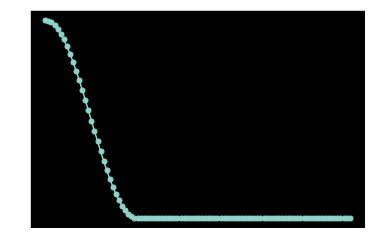

In [8]:
x = np.linspace(0, 100, 100)
plt.plot(x, fc(x, 30), '-o', ms=5)

In [9]:
symm_G1(x, 25)

12.875062963901758

In [10]:
x = np.linspace(0, 6., 100)

In [11]:
import funcs as ff

In [12]:
dist = ff.histogram_of_distances(int(1e7), verb=False)

Cargando: ../data/structures.csv ... OK!
Armando struct_dict OK!


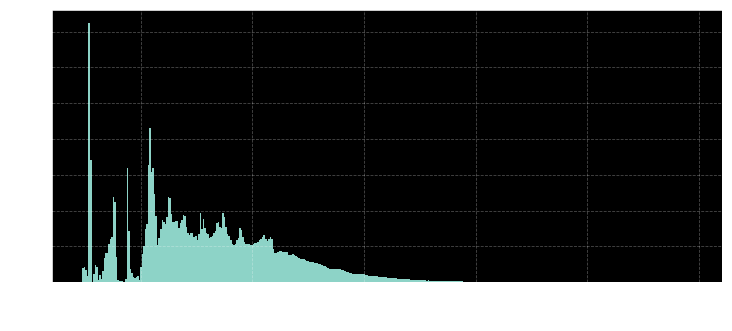

In [32]:
plt.figure(figsize=(12,5))
plt.hist(dist, bins=400, log=0);
plt.grid(ls='--', alpha=0.3)
#plt.xlim(0.25, 7.0);
plt.xlabel("$d_{ij}$", fontsize=16);

# > Visualicemos las symmmetry functions
## >> Parece q conviene $Rc \simeq 10$, xq usar $Rc = max(d_{ij}) = 12$ parece exagerado. Nos podemos sacar la duda haciendo un histograma de los valores de los descriptores para ver con cual $Rc$ encontramos mas esparcimiento.

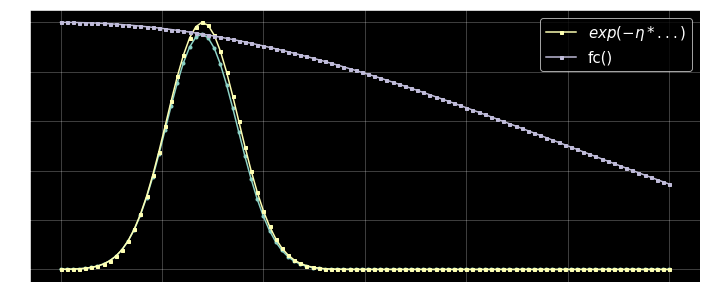

In [28]:
eta  = (1/0.5)**2
Rc   = 10. #12.
Rs   = 1.4

_g2, _t = symm_G2(x, eta, Rs, Rc, terms=True)

plt.figure(figsize=(12,5))
plt.plot(x, _t, '-o', ms=3)

plt.plot(x, np.exp(-eta * np.square(x - Rs)), '-s', ms=3, label='$exp(-\eta * ...)$')
plt.plot(x, fc(x, Rc), '-s', ms=3., label='fc()')

#plt.yscale('log')
plt.grid(ls='-', alpha=0.3)
plt.legend(fontsize=15)

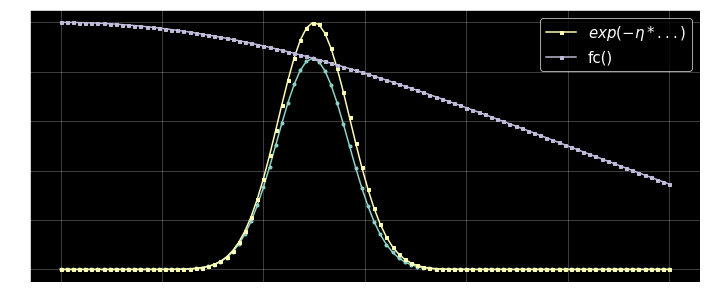

In [29]:
eta  = (1/0.5)**2
Rc   = 10. #12.
Rs   = 2.5

_g2, _t = symm_G2(x, eta, Rs, Rc, terms=True)

plt.figure(figsize=(12,5))
plt.plot(x, _t, '-o', ms=3)

plt.plot(x, np.exp(-eta * np.square(x - Rs)), '-s', ms=3, label='$exp(-\eta * ...)$')
plt.plot(x, fc(x, Rc), '-s', ms=3., label='fc()')

#plt.yscale('log')
plt.grid(ls='-', alpha=0.3)
plt.legend(fontsize=15)

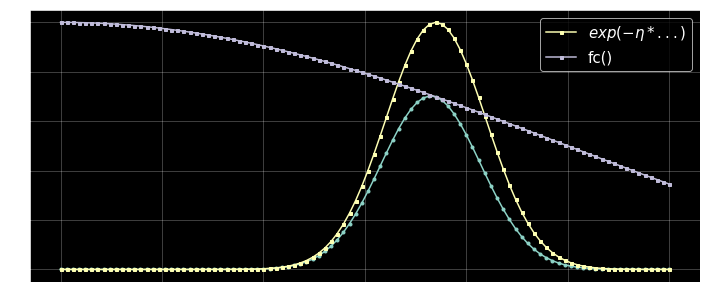

In [30]:
eta  = (1/0.7)**2
Rc   = 10. #12.
Rs   = 3.7

_g2, _t = symm_G2(x, eta, Rs, Rc, terms=True)

plt.figure(figsize=(12,5))
plt.plot(x, _t, '-o', ms=3)

plt.plot(x, np.exp(-eta * np.square(x - Rs)), '-s', ms=3, label='$exp(-\eta * ...)$')
plt.plot(x, fc(x, Rc), '-s', ms=3., label='fc()')

#plt.yscale('log')
plt.grid(ls='-', alpha=0.3)
plt.legend(fontsize=15)

In [17]:
dede

NameError: name 'dede' is not defined

In [ ]:
mm = funcs.molecule_mgr("../data/structures.csv")


In [ ]:
mm.m_structs.keys()

In [ ]:
mm.m_structs["pos"].shape